In [1]:
import sys
sys.path.append('..')  # Add parent directory to path
from utils.backtest import Backtest
from utils.data_handler import DataHandler

from strategies.ratio_value import RatioValueStrategy
from strategies.momentum import MomentumStrategy
from utils.backtest import Backtest
from utils.data_handler import DataHandler
import yfinance as yf
import pandas as pd

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy:


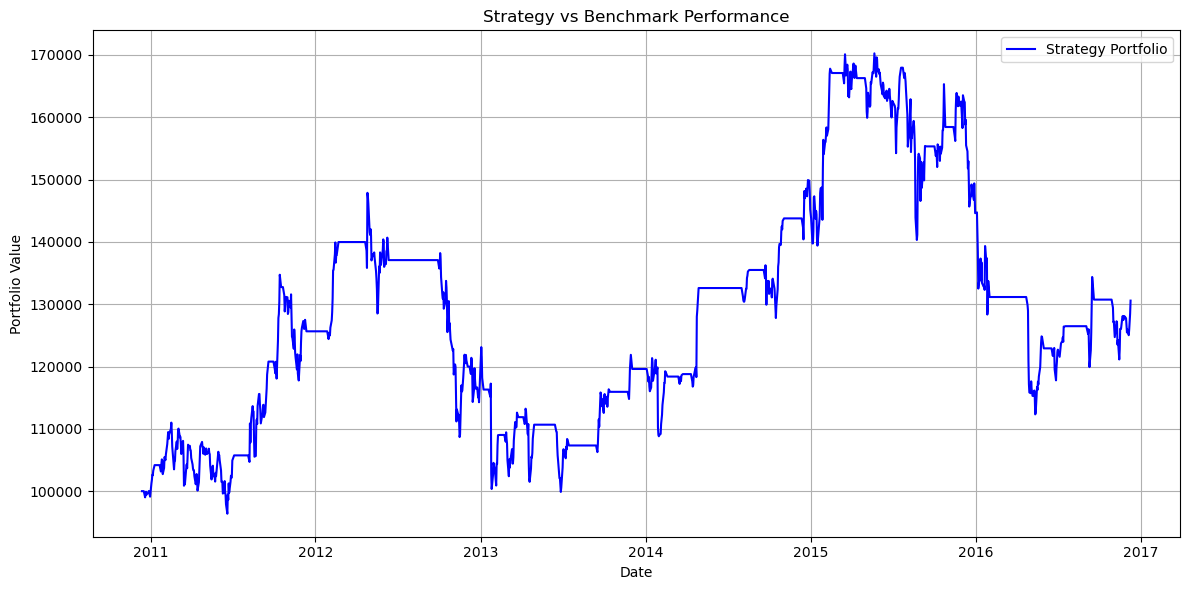

KeyError: 'PB_Ratio'

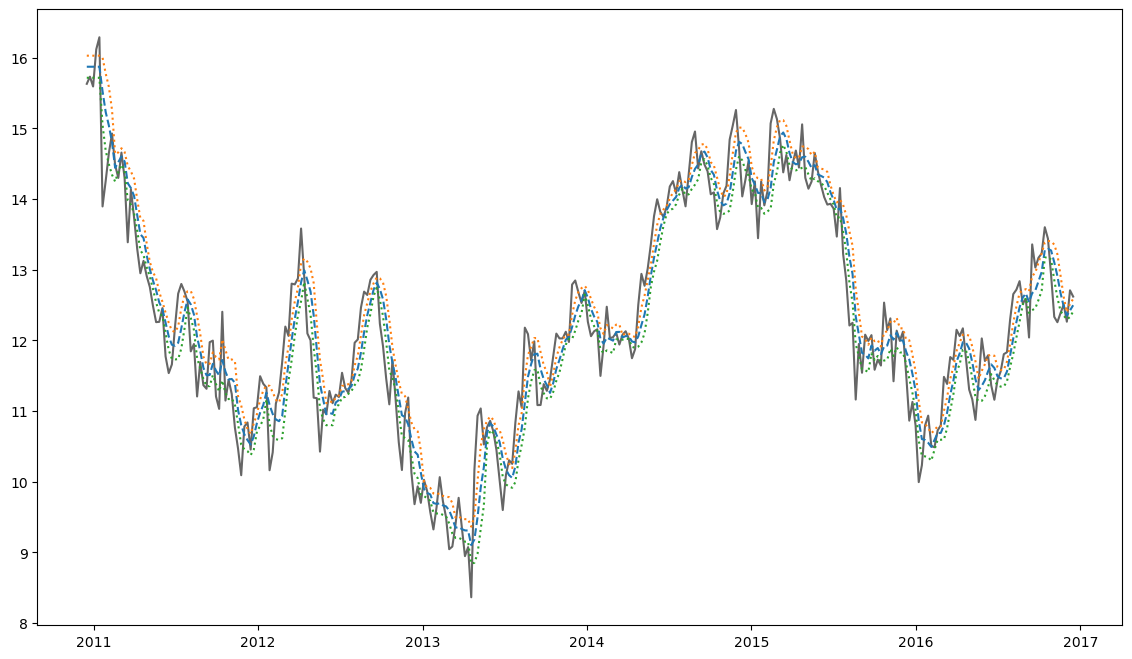

In [4]:
data_handler = DataHandler(ticker='AAPL', start_date='2010-12-12', end_date='2016-12-12')
prices = data_handler.fetch_data()

# Assume pb_series is a pandas Series with P/B ratios indexed by date
pb_series = data_handler.fetch_pe_series('../data/PE RATIO.xlsx')

# Test frequencies
frequencies = ['weekly', 'monthly', '6month', 'yearly']
results = {}

for freq in frequencies:
    print(f"\nTesting {freq} frequency strategy:")
    
    # Initialize strategy with current frequency
    strategy = RatioValueStrategy(pb_series, "PE", window=5, k=0.5, frequency=freq)
    
    # Run backtest
    backtest = Backtest(
        data=prices,
        strategy=strategy,
    )
    
    # Store results
    results[freq] = backtest.run()
    
    # Plot signals
    strategy.plot_signals(prices)
    
    # Print metrics
    print(f"\nResults for {freq} frequency:")
    print(f"Final Portfolio Value: ${results[freq]['Final Value']:,.2f}")
    print(f"Total Return: {results[freq]['Return']:.2%}")
    print(f"Sharpe Ratio: {results[freq]['Sharpe Ratio']:.2f}")
    print(f"Max Drawdown: {results[freq]['Max Drawdown']:.2%}")
    
# Compare strategies
print("\nStrategy Comparison:")
comparison = pd.DataFrame({
    freq: {
        'Final Value': results[freq]['Final Value'],
        'Total Return': results[freq]['Return'],
        'Sharpe Ratio': results[freq]['Sharpe Ratio'],
        'Max Drawdown': results[freq]['Max Drawdown']
    }
    for freq in frequencies
}).round(4)

print(comparison)